# Posição (ou separatrizes)

## Autores

- [Italo Seara](https://github.com/italoseara)
- [Lucas Luige](https://github.com/lluigecm)
- [Gabriel Prado](https://github.com/Gabriel-Prd)

## Objetivo

Apresentar o conceito de separatrizes e suas aplicações.

## Bibliotecas utilizadas

- [Numpy](https://numpy.org/) para cálculos numéricos
- [Matplotlib](https://matplotlib.org/) para visualização de dados
- [Pandas](https://pandas.pydata.org/) para manipulação de dados

In [464]:
# Carregando os pacotes necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Funções utilizadas

As funções criadas na célula abaixo serão utilizadas ao longo do notebook para facilitar a visualização dos dados, transformando os dados que seriam retornados em forma de arrays em dataframes que podem ser visualizados como uma tabela. Note que não é necessário utiliza-las para fins de cálculo, apenas para visualização.

Todas as funções abaixo usam a função `np.quantile` do numpy para calcular os quantis. A documentação da função pode ser encontrada [aqui](https://numpy.org/doc/stable/reference/generated/numpy.quantile.html).

In [465]:
def quartiles(arr: np.array) -> pd.DataFrame:
    return pd.DataFrame(
        np.quantile(arr, [0.25, 0.5, 0.75]), 
        columns=['Quartis'], 
        index=['25%', '50%', '75%']
    )

def deciles(arr: np.array) -> pd.DataFrame:
    return pd.DataFrame(
        np.quantile(arr, np.arange(0.1, 1, 0.1)),
        columns=['Decis'], 
        index=[f'{i}%' for i in range(10, 100, 10)]
    )

def percentiles(arr: np.array) -> pd.DataFrame:
    return pd.DataFrame(
        np.quantile(arr, np.arange(0.01, 1, 0.01)),
        columns=['Percentis'], 
        index=[f'{i}%' for i in range(1, 100)]
    )

# Quartis

## A partir de um array

In [466]:
# Criando um array
k = np.array([1, 3, 5, 6, 6, 9, 10, 13])

# Calculando os quartis
quartiles(k)

,Quartis
25%,4.50
50%,6.00
75%,9.25


In [467]:
# Criando um array de 1000 números aleatórios com distribuição normal
k = np.random.normal(size=1000)

# Calculando os quartis
quartiles(k)

,Quartis
25%,-0.686899
50%,-0.056314
75%,0.612335


In [468]:
# Caso queira calcular os quartis separadamente
q1 = np.quantile(k, 0.25)
q2 = np.quantile(k, 0.5)
q3 = np.quantile(k, 0.75)

q1, q2, q3

(-0.6868994725925084, -0.05631417773408856, 0.6123350443812684)

In [469]:
# Amplitude Interquartil
q3 - q1

1.299234516973777

## Visualização com Boxplot

<img src="https://api.www.labxchange.org/api/v1/xblocks/lb:LabXchange:d8863c77:html:1/storage/211626365402575-b88c4d0fdacd5abb4c3dc2de3bc004bb.png" width="600">

Documentação das principais funções utilizadas:
- [plt.boxplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html).

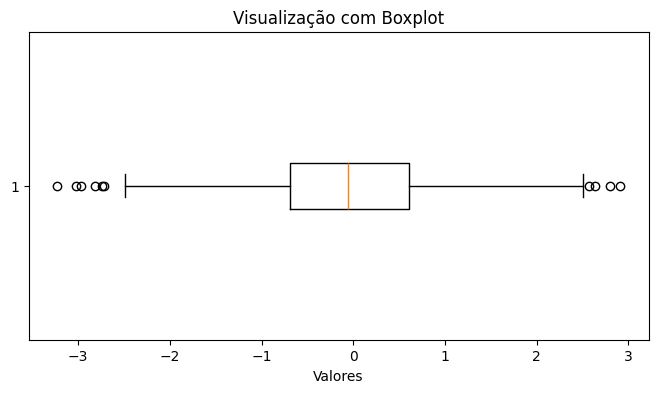

In [470]:
# Definindo o tamanho da figura
plt.figure(figsize=(8, 4))

# Definindo o título e os eixos
plt.title('Visualização com Boxplot')
plt.xlabel('Valores')

# Plotando o boxplot
plt.boxplot(k, vert=False)

# Mostrando o gráfico
plt.show()

## A partir de um conjunto de dados

Documentação das principais funções utilizadas:
- [pd.DataFrame.quantile](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html).
- [pd.DataFrame.boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html).

In [471]:
# Carregando o dataset
df = pd.read_csv('iris.csv')

df.info()  # Verificando as informações do dataset
df.head()  # Visualizando as primeiras linhas do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [472]:
# Calculando os quartis
df.quantile([0.25, 0.5, 0.75], numeric_only=True)
# `numeric_only=True` para calcular apenas as colunas numéricas, caso contrário, 
# ocorrerá um erro por conta da coluna `variety` (string)

,sepal.length,sepal.width,petal.length,petal.width
0.25,5.1,2.8,1.60,0.3
0.50,5.8,3.0,4.35,1.3
0.75,6.4,3.3,5.10,1.8


In [473]:
# Calculando os quartis de uma coluna
df["sepal.length"].quantile([0.25, 0.5, 0.75]).to_frame()

# OU

# quartiles(dt["sepal.length"])

,sepal.length
0.25,5.1
0.50,5.8
0.75,6.4


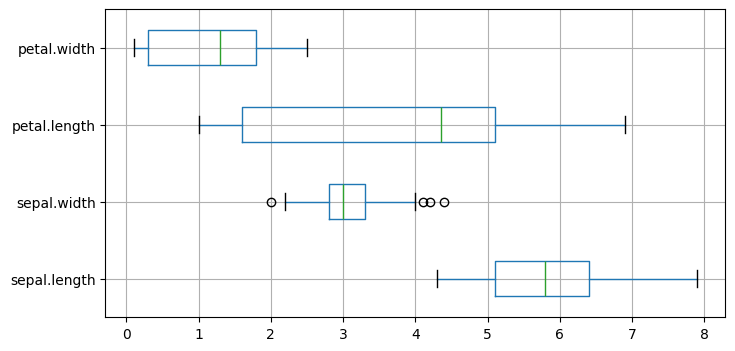

In [474]:
# Visualizando os quartis de todas as colunas usando boxplot
df.boxplot(figsize=(8, 4), vert=False)
plt.show()

# Decis

## A partir de um array

In [475]:
# O array utilizado será o `k` criado anteriormente

# Calculando os decis
deciles(k)

,Decis
10%,-1.267933
20%,-0.842620
30%,-0.543995
40%,-0.283193
50%,-0.056314
60%,0.201001
70%,0.458584
80%,0.804873
90%,1.212376


In [476]:
# Decis específicos
np.quantile(k, 0.3)

-0.5439945652232923

## Visualização com Gráfico de Barras

Documentação das principais funções utilizadas:
- [plt.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html).

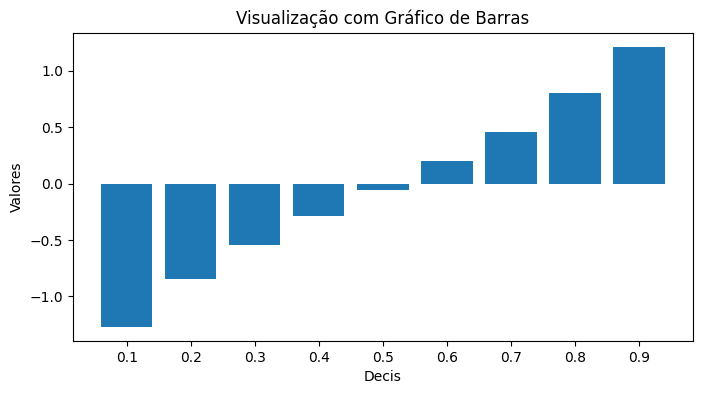

In [477]:
# Calculando os decis
d = np.quantile(k, np.arange(0.1, 1, 0.1))

# Definindo o tamanho da figura
plt.figure(figsize=(8, 4))

# Definindo o título e os eixos
plt.title('Visualização com Gráfico de Barras')
plt.xlabel('Decis')
plt.ylabel('Valores')

# Definindo os ticks do eixo x
plt.xticks(np.arange(0.1, 1, 0.1))

# Cada barra representa um decil
plt.bar(np.arange(0.1, 1, 0.1), d, width=0.08)

# Mostrando o gráfico
plt.show()

## A partir de um conjunto de dados

In [478]:
# O conjunto de dados utilizado será o `df` criado anteriormente

# Calculando os decis
df.quantile(np.arange(0.1, 1, 0.1), numeric_only=True)

,sepal.length,sepal.width,petal.length,petal.width
0.1,4.80,2.50,1.40,0.20
0.2,5.00,2.70,1.50,0.20
0.3,5.27,2.80,1.70,0.40
0.4,5.60,3.00,3.90,1.16
0.5,5.80,3.00,4.35,1.30
0.6,6.10,3.10,4.64,1.50
0.7,6.30,3.20,5.00,1.80
0.8,6.52,3.40,5.32,1.90
0.9,6.90,3.61,5.80,2.20


In [479]:
# Calculando os decis de uma coluna
df["sepal.length"].quantile(np.arange(0.1, 1, 0.1)).to_frame()

# OU

# deciles(dt["sepal.length"])

,sepal.length
0.1,4.80
0.2,5.00
0.3,5.27
0.4,5.60
0.5,5.80
0.6,6.10
0.7,6.30
0.8,6.52
0.9,6.90


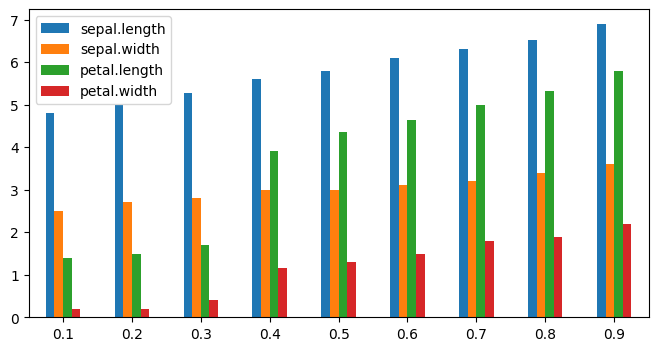

In [480]:
# Visualizando os decis de todas as colunas usando gráfico de barras
# NOTA: É necessário arredondar os valores para evitar erros de precisão de ponto flutuante

df.quantile(np.round(np.arange(0.1, 1, 0.1), 1), numeric_only=True)\
    .plot.bar(figsize=(8, 4))
plt.xticks(rotation=0)
plt.show()

In [483]:
# - Percentis

# A partir de um vetor
k = np.array([31, 31, 37, 40, 48, 50, 51, 51, 60, 62, 64, 65, 65, 65, 66, 74, 74, 88, 91, 92])

# Todos os percentis
percentiles(k)

,Percentis
1%,31.00
2%,31.00
3%,31.00
4%,31.00
5%,31.00
...,...
95%,91.05
96%,91.24
97%,91.43
98%,91.62


In [484]:
# Percentis específicos
np.quantile(k, 0.92)

89.44

In [485]:
# A partir de um DataFrame
df = pd.read_csv('iris.csv')

# Todos os percentis
percentiles(df['sepal.length'])

,Percentis
1%,4.400
2%,4.400
3%,4.547
4%,4.600
5%,4.600
...,...
95%,7.255
96%,7.408
97%,7.653
98%,7.700


In [486]:
# Percentis específicos
np.quantile(df['sepal.length'], 0.07)

4.743